## **Stacks**

A stack is an ordered collection of elements where elements are only added and removed from the same end. Another term used to describe stacks is LIFO, which stands for last in, first out. The last (most recent) element placed inside is the first element to come out.

Stacks are very simple to implement. Some languages like Java have built-in stacks. In Python, you can just use a list stack = [] and use stack.append(element) and stack.pop(). In fact, any dynamic array can implement a stack. Typically, inserting into a stack is called pushing and removing from a stack is called popping. Stacks will usually also come with operations like peek, which means looking at the element at the top of the stack.

<video src="20240130-1952-58.3079751.mp4" controls title="Title"></video>

The time complexity of stack operations is dependent on the implementation. If you use a dynamic array, which is the most common and easiest way, then the time complexity of your operations is the same as that of a dynamic array. O(1) push, pop, and random access, and O(n) search. Sometimes, a stack may be implemented with a linked list with a tail pointer.

In [1]:
# Declaration: we will just use a list
stack = []

# Pushing elements:
stack.append(1)
stack.append(2)
stack.append(3)

# Popping elements:
stack.pop() # 3
stack.pop() # 2

# Check if empty
not stack # False

# Check element at top
stack[-1] # 1

# Get size
len(stack) # 1

1

Example 1: 20. Valid Parentheses

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid. The string is valid if all open brackets are closed by the same type of closing bracket in the correct order, and each closing bracket closes exactly one open bracket.

For example, s = "({})" and s = "(){}[]" are valid, but s = "(]" and s = "({)}" are not valid.

In [27]:
def isValid(s):

    my_dict = {
        "(": ")",
        "{": "}",
        "[": "]",
    }
    stack = []  # create an empty stack to store opening brackets
    for char in s:
        if char in my_dict.keys():
            stack.append(char)
            
        elif len(stack) == 0 or my_dict[stack.pop()] != char:
            return False
    return len(stack) == 0 




                

In [28]:
s = "{([]){}}"
isValid(s)


True

Example 2: 1047. Remove All Adjacent Duplicates In String

You are given a string s. Continuously remove duplicates (two of the same character beside each other) until you can't anymore. Return the final string after this.

For example, given s = "abbaca", you can first remove the "bb" to get "aaca". Next, you can remove the "aa" to get "ca". This is the final answer.

In [57]:
def removeDuplicates(s):
    stack = []
    for ch in s:
        if stack and stack[-1] == ch:
            stack.pop()
        else:
            stack.append(ch)
    return "".join(stack)

In [59]:
s = "aababaab"
removeDuplicates(s)

'ba'

Example 3: 844. Backspace String Compare

Given two strings s and t, return true if they are equal when both are typed into empty text editors. '#' means a backspace character.

For example, given s = "ab#c" and t = "ad#c", return true. Because of the backspace, the strings are both equal to "ac".

In [75]:
def backspaceCompare(s, t):
    s_stack = []
    t_stack = []
    
    for ch in s:
        if ch != "#":
            s_stack.append(ch)
        elif s_stack:
            s_stack.pop()
    for ch in t:
        if ch != "#":
            t_stack.append(ch)
        elif t_stack:
            t_stack.pop()
    return s_stack == t_stack

In [76]:
s = "ab##"
t = "c#d#"
backspaceCompare(s, t)

True

**Queues**

While a stack followed a LIFO pattern, a queue follows FIFO (first in first out). In a stack, elements are added and removed from the same side. In a queue, elements are added and removed from opposite sides. Queues are trickier to implement than stacks if you want to maintain good performance. Like a stack, you could just use a dynamic array, but operations on the front of the array (adding or removal) are O(n), where n is the size of the array. Adding to a queue is called enqueue and deletions are called dequeue. If you want these operations to be O(1), you'll need a more sophisticated implementation.

or algorithm problems, queues are less common than stacks, and the problems are generally more difficult. The most common use of a queue is to implement an algorithm called breadth-first search (BFS)

In [ ]:
# Declaration: we will use deque from the collections module
import collections
queue = collections.deque()

# If you want to initialize it with some initial values:
queue = collections.deque([1, 2, 3])

# Enqueueing/adding elements:
queue.append(4)
queue.append(5)

# Dequeuing/removing elements:
queue.popleft() # 1
queue.popleft() # 2

# Check element at front of queue (next element to be removed)
queue[0] # 3

# Get size
len(queue) # 3

**Monotonic**

A monotonic stack or queue is one whose elements are always sorted. It can be sorted either ascending or descending, depending on the algorithm. Monotonic stacks and queues maintain their sorted property by removing elements that would violate the property before adding new elements. For example, let's say you had a monotonically increasing stack, currently stack = [1, 5, 8, 15, 23]. You want to push 14 onto the stack. To maintain the sorted property, we need to first pop the 15 and 23 before pushing the 14 - after the push operation, we have stack = [1, 5, 8, 14].

Here's some pseudocode for maintaining a monotonic increasing stack over an input array:

    Given an integer array nums

    stack = []
    for num in nums:
        while stack.length > 0 AND stack.top >= num:
            stack.pop()
        // Between the above and below lines, do some logic depending on the problem
        stack.push(num)

Example 1: 739. Daily Temperatures

Given an array of integers temperatures that represents the daily temperatures, return an array answer such that answer[i] is the number of days you have to wait after the ith  day to get a warmer temperature. If there is no future day that is warmer, have answer[i] = 0 instead.

    Because the stack is monotonically decreasing, we are guaranteed to pop elements only when we find the first warmer temperature.

In [ ]:
class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        stack = []
        answer = [0] * len(temperatures)
        
        for i in range(len(temperatures)):
            while stack and temperatures[stack[-1]] < temperatures[i]:
                j = stack.pop()
                answer[j] = i - j
            stack.append(i)
        
        return answer

Example 2: 239. Sliding Window Maximum(HARD)

Given an integer array nums and an integer k, there is a sliding window of size k that moves from the very left to the very right. For each window, find the maximum element in the window.

For example, given nums = [1, 3, -1, -3, 5, 3, 6, 7], k = 3, return [3, 3, 5, 5, 6, 7]. The first window is [1, 3, -1, -3, 5, 3, 6, 7] and the last window is [1, 3, -1, -3, 5, 3, 6, 7]

Note: this problem is significantly more difficult than any problem we have looked at so far. Don't be discouraged if you are having trouble understanding the solution.

In [ ]:
from collections import deque

class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        ans = []
        queue = deque()
        for i in range(len(nums)):
            # maintain monotonic decreasing.
            # all elements in the deque smaller than the current one
            # have no chance of being the maximum, so get rid of them
            while queue and nums[i] > nums[queue[-1]]:
                queue.pop()

            queue.append(i)

            # queue[0] is the index of the maximum element.
            # if queue[0] + k == i, then it is outside the window
            if queue[0] + k == i:
                queue.popleft()
            
            # only add to the answer once our window has reached size k
            if i >= k - 1:
                ans.append(nums[queue[0]])

        return ans

Example 3: 1438. Longest Continuous Subarray With Absolute Diff Less Than or Equal to Limit

Given an array of integers nums and an integer limit, return the size of the longest subarray such that the absolute difference between any two elements of this subarray is less than or equal to limit.

In [ ]:
from collections import deque

class Solution:
    def longestSubarray(self, nums: List[int], limit: int) -> int:
        increasing = deque()
        decreasing = deque()
        left = ans = 0
        
        for right in range(len(nums)):
            # maintain the monotonic deques
            while increasing and increasing[-1] > nums[right]:
                increasing.pop()
            while decreasing and decreasing[-1] < nums[right]:
                decreasing.pop()
                
            increasing.append(nums[right])
            decreasing.append(nums[right])
            
            # maintain window property
            while decreasing[0] - increasing[0] > limit:
                if nums[left] == decreasing[0]:
                    decreasing.popleft()
                if nums[left] == increasing[0]:
                    increasing.popleft()
                left += 1
            
            ans = max(ans, right - left + 1)

        return ans

**On solution spaces**

There is a more creative way to use binary search - on a solution space/answer. A very common type of problem is "what is the max/min that something can be done". Binary search can be used if the following criteria are met:

1. You can quickly (in O(n) or better) verify if the task is possible for a given number x.
2. If the task is possible for a number x, and you are looking for:
    - A maximum, then it is also possible for all numbers less than x.
    - A minimum, then it is also possible for all numbers greater than x.
3. If the task is not possible for a number x, and you are looking for:
    - A maximum, then it is also impossible for all numbers greater than x.
    - A minimum, then it is also impossible for all numbers less than x.
    
The 2nd and 3rd requirements imply that there are two "zones". One where it is possible and one where it is impossible. The zones have no breaks, no overlap, and are separated by a threshold.

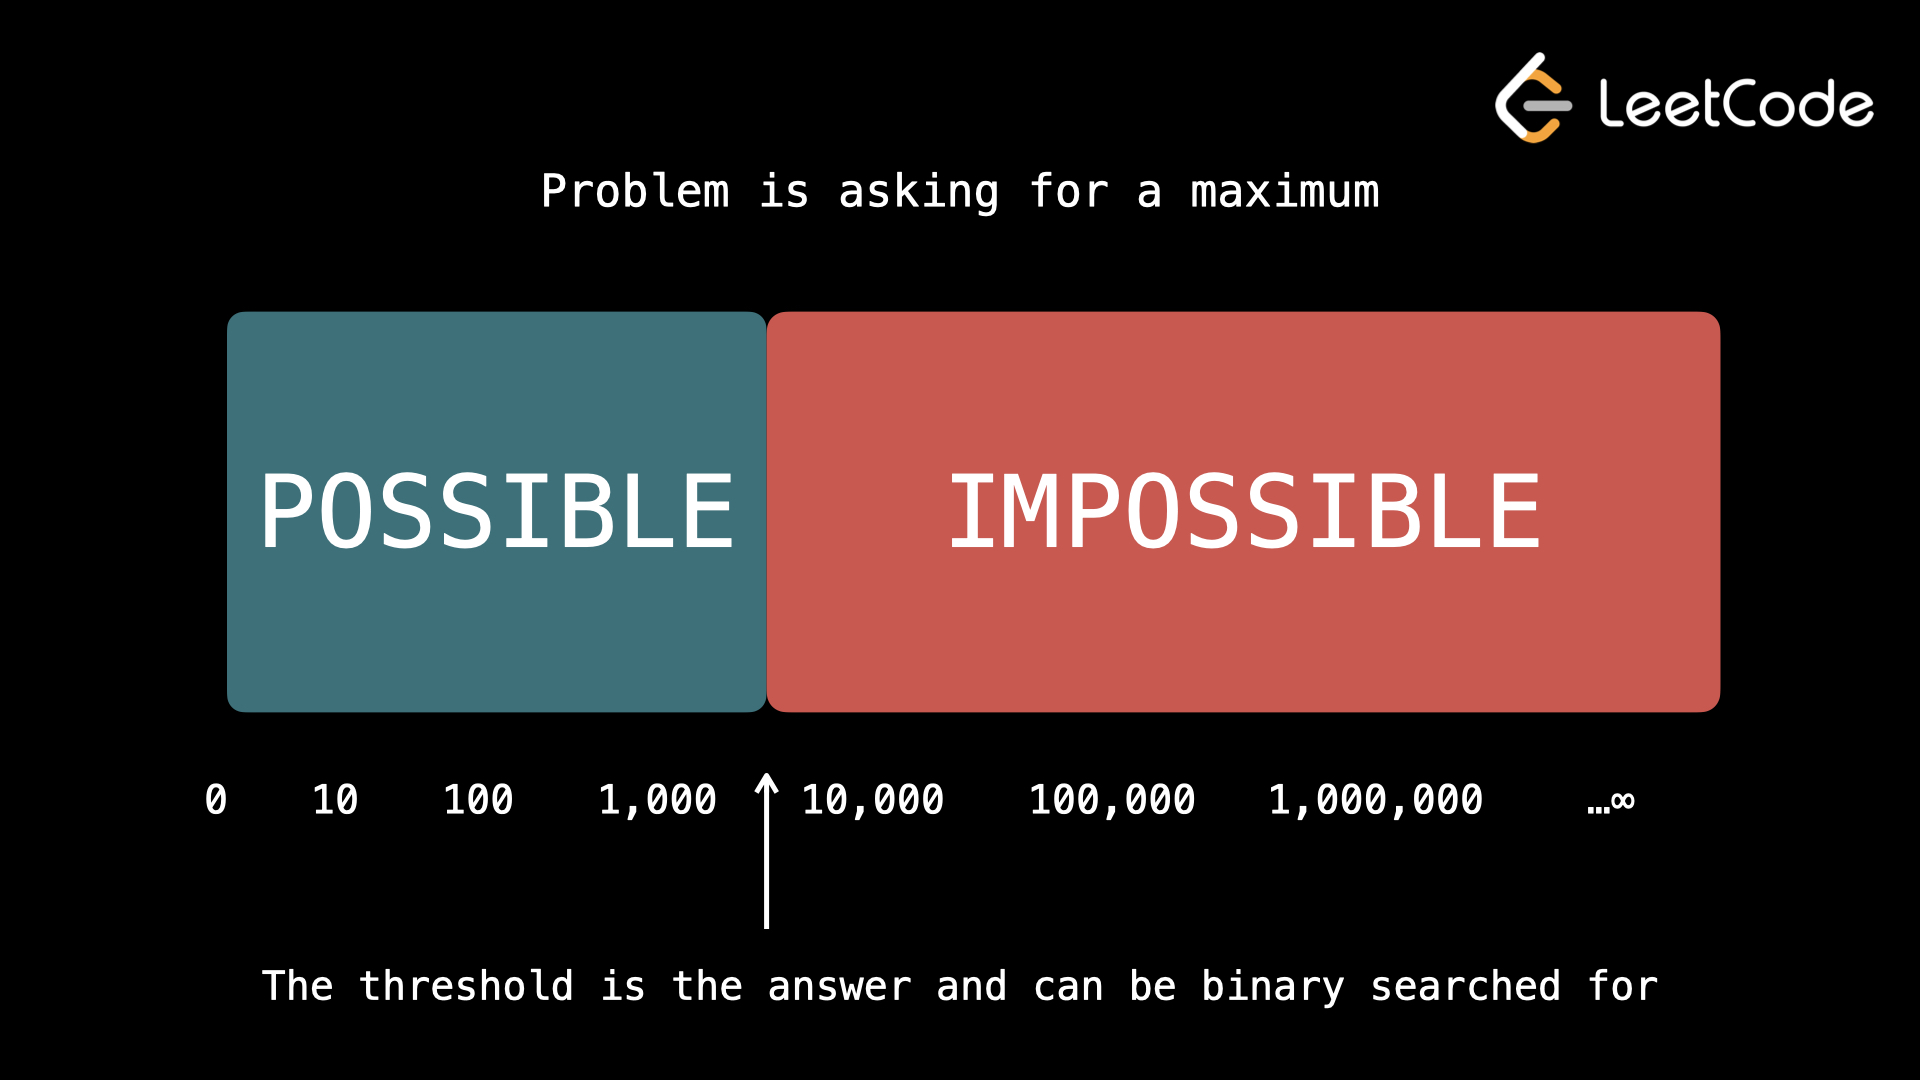

When a problem wants you to find the min/max, it wants you to find the threshold where the task transitions from impossible to possible.

First, we establish the possible solution space by identifying the minimum possible answer and the maximum possible answer.

Next, we binary search on this solution space. For each mid, we perform a check to see if the task is possible. Depending on the result, we halve the search space. Eventually, we will find the threshold.

If the first requirement is met (quick verification if mid is possible), then this will give us a time complexity of log O(n⋅logk), where k is the solution space's range. Even if the possible solution space is huge, logarithms run so fast that this is a very efficient time complexity.

We can write a function check that takes an integer and checks if the task is possible for that integer. In most cases, the algorithm we use in this function will be a greedy one. Let's take a look at some examples.

Example 1: 875. Koko Eating Bananas

Koko loves to eat bananas. There are n piles of bananas, the ith pile has piles[i] bananas. Koko can decide her bananas-per-hour eating speed of k. Each hour, she chooses a pile and eats k bananas from that pile. If the pile has less than k bananas, she eats all of them and will not eat any more bananas during the hour. Return the minimum integer k such that she can eat all the bananas within h hours.

In [101]:
from math import ceil
def minEatingSpeed(piles, h):
    l = 1
    r = max(piles)
    while l <= r:
        time = 0
        mid = (l+r)//2
        for num in piles:
            time += ceil(1.0*num/mid)
        if time > h:
            l = mid + 1
        else:
            r = mid - 1
    return l



In [102]:
piles = [30,11,23,4,20]
minEatingSpeed(piles, 5)

30

Example 2: 1631. Path With Minimum Effort(learn graphs first)

You are given heights, a positive 2D array of size m x n, where heights[row][col] represents the height of cell (row, col). You can move up, down, left, or right. A path's effort is the largest absolute difference you can have between any two consecutive cells traversed. Return the minimum effort required to get from the top left to the bottom right.

**A note on implementation**

If a problem is instead asking for a maximum, then left will not actually be the correct answer at the end. Instead, we should return right.